# REITS Factor Models

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import os

def reits_reader(ticker):
    directory = os.path.join("/Users/lamhochit/PycharmProjects/REITS_Factor_Models/","REITS_Data/")
    for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                if file == ticker + ".csv":
                    df = pd.read_csv(directory + file)
                    return df
    return None

## Predicting Factors

### Risk Factors

1. Market Beta
2. Monthly Return Volatility
3. Volatility of EPS
4. Total Debt Ratio

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# data retrieval
start_date = '2020-01-10'
end_date = '2020-02-10'

# Enter Target REITS name here
reits_name = 'DLR'

# Target REITS
sr1 = reits_reader(reits_name)
sr1.index = sr1['Date'].values
sr1.name = reits_name
sr1 = sr1.loc[start_date:end_date]

# Assign SPY Index as Market

spy = pd.read_csv('SPY.csv')
spy.index = spy['Date'].values
spy = spy.loc[start_date:end_date]

if len(spy) == len(sr1):
    print('REITS {0} has been correctly imported.'.format(reits_name))
else:
    print('REITS length is different from SPY length')

REITS DLR has been correctly imported.


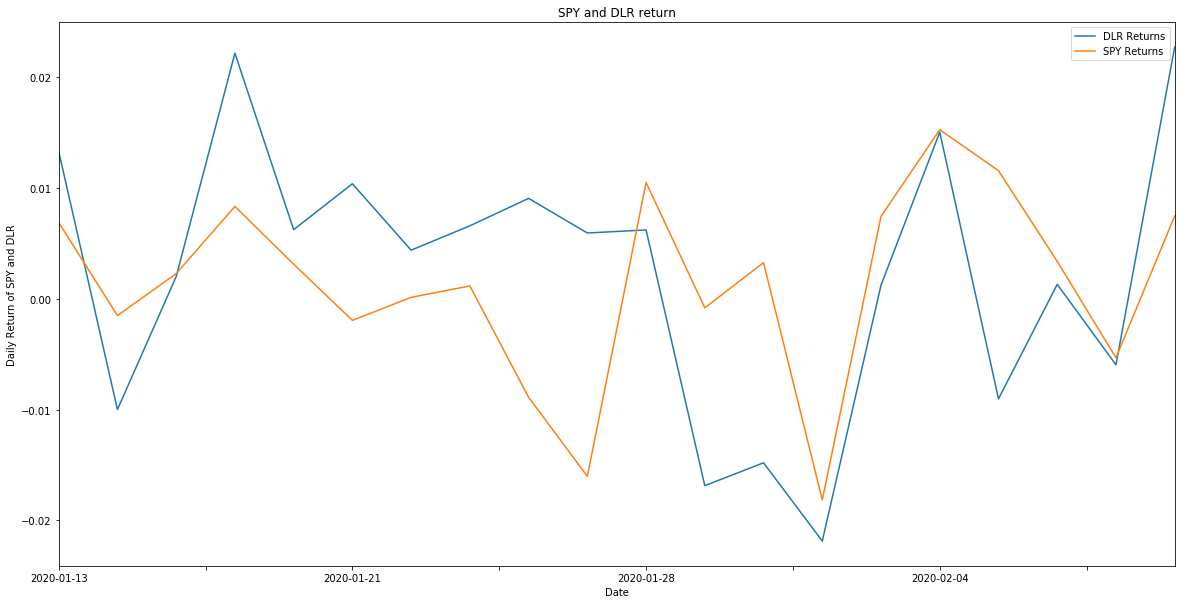

In [5]:
%matplotlib inline

return_reits = sr1['CLOSE'].pct_change()[1:]
return_reits.name = '{0} Returns'.format(reits_name)
return_spy = spy['CLOSE'].pct_change()[1:]
return_spy.name = 'SPY Returns'

plt.figure(figsize=(20, 10))
return_reits.plot()
return_spy.plot()
plt.xlabel('Date')
plt.ylabel('Daily Return of SPY and {0}'.format(reits_name))
plt.title('SPY and {0} return'.format(reits_name))
plt.legend()
plt.show()

alpha: 0.0016
beta: 0.59


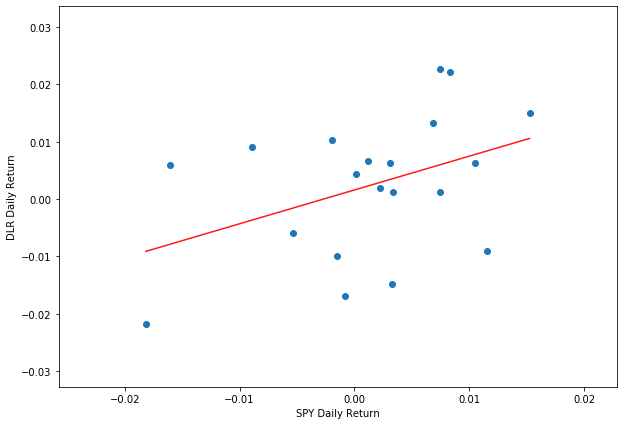

In [6]:
import statsmodels.api as sm
from statsmodels import regression

# X as Market, Y as REITS
def linreg(x, y):
    
    x1 = sm.add_constant(x.to_numpy())
    model = sm.OLS(y, x1).fit()
    
    return model.params[0], model.params[1]

alpha, beta = linreg(return_spy, return_reits)
print('alpha: ' + str(round(alpha, 4)))
print ('beta: ' + str(round(beta, 4)))

X2 = np.linspace(return_spy.min(), return_spy.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(10, 7))
plt.scatter(return_spy, return_reits)
plt.xlabel('SPY Daily Return')
plt.ylabel('{0} Daily Return'.format(reits_name))
plt.title = 'SPY and {0} Beta'.format(reits_name)

plt.plot(X2, Y_hat, 'r', alpha=0.9)

plt.show()

In [7]:
# Standard Deviation of monthly security returns
def return_volatility(sr):
    volatility = np.std(sr)
    return round(volatility, 4)
    
r_vol = return_volatility(return_reits)

In [8]:
# Import fundamental data of the reits
f_sr1 = reits_reader(reits_name + 'fundamental')
f_sr1.name = reits_name

date_list = []
count = 0

for i in ['2015', '2016', '2017', '2018', '2019']:
    for j in ['-03-31', '-06-30', '-09-30', '-12-31']:
        date_list.append(i+j)
        
f_sr1.iloc[:, 0] = date_list
f_sr1.index = f_sr1.iloc[:, 0]
f_sr1.fillna(method='ffill', inplace=True)
print(f_sr1)

            Unnamed: 0 Instrument      Revenue       EBITDA  \
Unnamed: 0                                                    
2015-03-31  2015-03-31        DLR  406609000.0  295863000.0   
2015-06-30  2015-06-30        DLR  420295000.0  258194000.0   
2015-09-30  2015-09-30        DLR  435989000.0  269428000.0   
2015-12-31  2015-12-31        DLR  500443000.0  272186000.0   
2016-03-31  2016-03-31        DLR  504199000.0  289032000.0   
2016-06-30  2016-06-30        DLR  514934000.0  291507000.0   
2016-09-30  2016-09-30        DLR  546293000.0  299898000.0   
2016-12-31  2016-12-31        DLR  576787000.0  336664000.0   
2017-03-31  2017-03-31        DLR  550569000.0  317072000.0   
2017-06-30  2017-06-30        DLR  565989000.0  323003000.0   
2017-09-30  2017-09-30        DLR  609925000.0  337872000.0   
2017-12-31  2017-12-31        DLR  731445000.0  420852000.0   
2018-03-31  2018-03-31        DLR  744368000.0  442780000.0   
2018-06-30  2018-06-30        DLR  754919000.0  4484560

In [9]:
eps_sr1 = f_sr1['Basic Normalized EPS']
print(eps_sr1)

def eps_volatility(sr):
    volatility = np.std(sr)
    return round(volatility, 4)

eps_vol = eps_volatility(eps_sr1)

Unnamed: 0
2015-03-31    0.62076
2015-06-30    0.33182
2015-09-30    0.36398
2015-12-31   -0.26252
2016-03-31    0.27861
2016-06-30    0.21395
2016-09-30    0.18347
2016-12-31    0.54491
2017-03-31    0.43875
2017-06-30    0.44299
2017-09-30    0.26978
2017-12-31    0.18632
2018-03-31    0.25398
2018-06-30    0.27554
2018-09-30    0.24627
2018-12-31    0.23790
2019-03-31    0.24395
2019-06-30    0.26449
2019-09-30    0.28153
2019-12-31    0.28153
Name: Basic Normalized EPS, dtype: float64


In [10]:
debt_ratio_sr1 = f_sr1[['Total Assets', 'Total Debt']]

def debt_ratio(sr):
    sr['Total Debt Ratio'] = sr['Total Debt'] / sr['Total Assets']
    return sr['Total Debt Ratio']

total_debt_ratio = debt_ratio(debt_ratio_sr1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
def print_risk_factors():
    print('Market Beta: {0}'.format(str(beta)))
    print('Monthly return volatility: {0}'.format(str(r_vol)))
    print('Volatility of EPS: {0}'.format(str(eps_vol)))
    print('Total debt ratio: {0}'.format(str(total_debt_ratio.iloc[-1])))
    return None

In [14]:
print_risk_factors()

Market Beta: 0.5899968233624616
Monthly return volatility: 0.012
Volatility of EPS: 0.1687
Total debt ratio: 0.47867835366215467


### Liquidity Factors

1. Market cap
2. Price per share
3. Volume
4. Turnover